# Making predictions over amazon recommendation dataset

## Predictions
The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will not focus on the Score, but only the positive/negative sentiment of the recommendation.

To do so, we will work on Amazon's recommendation dataset, we will build a Term-doc incidence matrix using term frequency and inverse document frequency ponderation. When the data is ready, we will load it into predicitve algorithms. In the end, we hope to find a "best" model for predicting the recommendation's sentiment.

## Loading the data
As we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "postive". Otherwise, it will be set to "negative".

The data will be split into an training set and a test set with a test set ratio of 0.2

# Part 1: Notebook Configuration

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('all')

plt.style.use('ggplot')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Part 2: Data Preprocessing

## 2.1 Loading Data

In [ ]:
import gdown

# URL for the Google Drive file
url_df = 'https://drive.google.com/uc?id=1vDaYexE-LAeQxJ2tE71wbMkJ-JGWCPEH'

# Define the output file name
output_name = 'amazon_food_review.csv'

# Download the file
gdown.download(url_df, output_name, quiet=False)

# Load the file into a DataFrame
df_raw = pd.read_csv(output_name)

# Deep Copy the df_raw
df = df_raw.copy(deep = True)

Downloading...
From (original): https://drive.google.com/uc?id=1vDaYexE-LAeQxJ2tE71wbMkJ-JGWCPEH
From (redirected): https://drive.google.com/uc?id=1vDaYexE-LAeQxJ2tE71wbMkJ-JGWCPEH&confirm=t&uuid=3f973447-403a-40ab-ab73-f02a7e874dd8
To: /content/amazon_food_review.csv
100%|██████████| 301M/301M [00:05<00:00, 56.1MB/s]


## 2.2 Dataset Information

In [ ]:
# Show the df shape
pd.DataFrame([[df.shape[0], df.shape[1]]], columns = ['Row', 'Column'])

,Row,Column
0,568454,10


In [ ]:
# check num of unique items per column
num_unique = pd.DataFrame({'Column Name':df.columns, 'Unique Values Amount':df.nunique()}).reset_index(drop = True)

num_unique

,Column Name,Unique Values Amount
0,Id,568454
1,ProductId,74258
2,UserId,256059
3,ProfileName,218415
4,HelpfulnessNumerator,231
5,HelpfulnessDenominator,234
6,Score,5
7,Time,3168
8,Summary,295742
9,Text,393579


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 2.3 Handling Identifiers

Deleting all identifiers that is no relationship with sentiment.


In [ ]:
df = df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName''])

df.head(5)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


## 2.4 Handling Time/Date Data

In [ ]:
df = df.drop(columns = ['Time'])

df.head(5)

KeyError: "['Time'] not found in axis"

## 2.5 Feature Engineering




In [ ]:
# If the score more than 3, sentiment is positive while  negative
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")

df.head(5)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,positive


In [ ]:
# rename columns HelpfulnessNumerator and HelpfulnessDenominator and rerank the columns order
df.columns = ["VotesHelpful", "VotesTotal", "Score", "Summary", "Text", "Sentiment"]

# rerank the columns
df = df[['Sentiment', 'VotesHelpful', 'VotesTotal', 'Score', 'Summary', 'Text']]

# Show the first 5 rows of df
df.head(5)

,Sentiment,VotesHelpful,VotesTotal,Score,Summary,Text
0,positive,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,negative,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,positive,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,negative,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,positive,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


## 2.6 Encoding Sentiment

In [ ]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == "positive" else 0)

## 2.8 Correlation between Sentiment and Votes

In [ ]:
df[['Sentiment', 'VotesHelpful', 'VotesTotal']].corr()

,Sentiment,VotesHelpful,VotesTotal
Sentiment,1.00000,-0.029740,-0.089330
VotesHelpful,-0.02974,1.000000,0.974689
VotesTotal,-0.08933,0.974689,1.000000


In [ ]:
# Delete the VotesHelpful, VotesTotal because of the small correlation between Sentiment
df.drop(columns = ['VotesHelpful', 'VotesTotal'], inplace = True)

df.head(5)

,Sentiment,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,0,2,Cough Medicine,If you are looking for the secret ingredient i...
4,1,5,Great taffy,Great taffy at a great price. There was a wid...


## 2.9 Dropping Score

Because score as a feature that has been engineered, it is unnecessary to use it again

In [ ]:
df = df.drop(columns = ['Score'])

df.head(5)

,Sentiment,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,1,Great taffy,Great taffy at a great price. There was a wid...


## 2.10 Handling Missing Values

In [ ]:
# Check whether there is mising values in the df
df.isna().sum()

Sentiment     0
Summary      27
Text          0
dtype: int64

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
# Check whether there is mising values in the df again
df.isna().sum()

Sentiment    0
Summary      0
Text         0
dtype: int64

## 2.10 Text Extracting

In [ ]:
# Importing some packages to do the four processing of sentimentg analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [ ]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function to preprocess text
def preprocess_text(text):
  # Tokenize text
  tokens = word_tokenize(text)
  # Remove stop words and lemmatize
  tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
  return " ".join(tokens)

In [ ]:
# Apply the function to the text data in df
df['Text'] = df['Text'].apply(preprocess_text)

df.head(5)

,Sentiment,Summary,Text
0,1,Good Quality Dog Food,bought several vitality canned dog food produc...
1,0,Not as Advertised,product arrived labeled jumbo salted peanut pe...
2,1,"""Delight"" says it all",confection around century light pillowy citrus...
3,0,Cough Medicine,looking secret ingredient robitussin believe f...
4,1,Great taffy,great taffy great price wide assortment yummy ...


In [ ]:
# Apply the function to Summary in the data
df['Summary'] = df['Summary'].apply(preprocess_text)

df.head(5)

,Sentiment,Summary,Text
0,1,good quality dog food,bought several vitality canned dog food produc...
1,0,advertised,product arrived labeled jumbo salted peanut pe...
2,1,delight say,confection around century light pillowy citrus...
3,0,cough medicine,looking secret ingredient robitussin believe f...
4,1,great taffy,great taffy great price wide assortment yummy ...


## 2.11 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

## 2.12 Further Processing for Model Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Summary'] + ' ' +df['Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test = vectorizer.transform(X_test)


# Part 3: Model Training

## 3.1 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression()

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on the testing data using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic, average='macro'))
print("Recall:", recall_score(y_test, y_pred_logistic, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_logistic, average='macro'))

Logistic Regression Metrics:
Accuracy: 0.9132434952412786
Precision: 0.8875585583343889
Recall: 0.8487987923077924
F1 Score: 0.8660570235800582


## 3.2 ROC AUC for Logistic Model

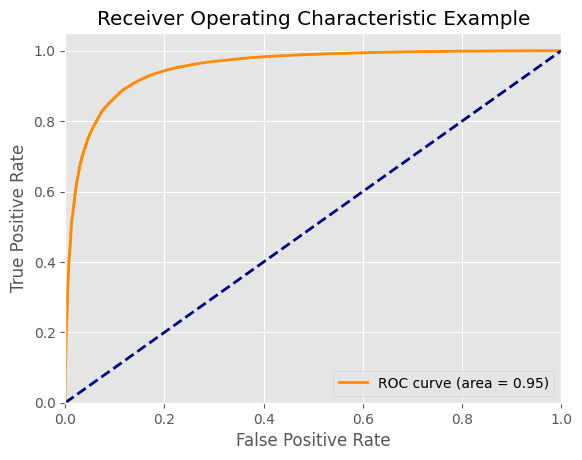

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predictprobabilities for the test data
y_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_probs_logistic)
roc_auc = roc_auc_score(y_test, y_probs_logistic)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

The ROC curve shown in the graph is 0.95. The 1 is the best situation, so 0.95 is a quite good result for a model to predict the sentiment.

## 3.3 Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

# Predict on the testing data using Random Forest
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest, average='macro'))
print("Recall:", recall_score(y_test, y_pred_forest, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_forest, average='macro'))


Random Forest Metrics:
Accuracy: 0.9115898175676864
Precision: 0.9375742693874838
Recall: 0.8028679437956494
F1 Score: 0.8482771709012148


## 3.4 ROC AUC for Random Forest Model

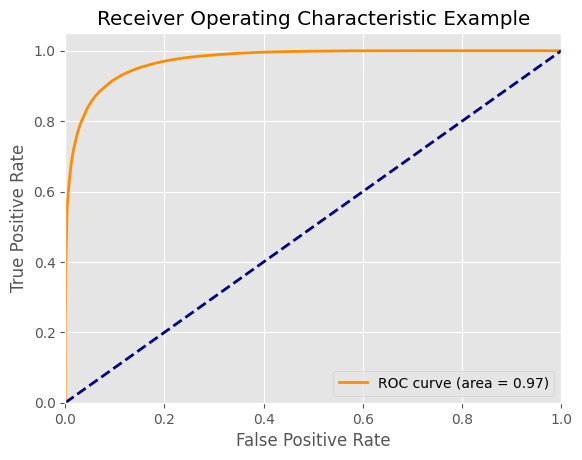

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test data
y_probs_forest = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs_forest)
roc_auc = roc_auc_score(y_test, y_probs_forest)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

As ROC curve graph shown, the area is 0.97 better than Logistic Model. It is also a good model to analyse sentiment.